# Naive Bayes and Text Mining:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
import re
import string
import nltk

# Data Exploration and Preprocessing

In [2]:
data=pd.read_csv("blogs.csv")

In [3]:
data

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [4]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [7]:
def clean(x):
    x=x.lower()
    x=re.sub('[\.*?/]','',x)
    x=re.sub('[%s]' %re.escape(string.punctuation),'',x)
    x=re.sub('w*\d\w*','',x)
    x=re.sub('[0-9]','',x)
    x=re.sub('[''""..,]','',x)
    return x
cleaned_data=lambda x:clean(x)

In [8]:
data['Data']=data.Data.apply(cleaned_data)
data

,Data,Labels
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism
1,newsgroups altatheism\npath cantaloupesrvcscmu...,alt.atheism
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism
4,xref cantaloupesrvcscmuedu altatheism talkreli...,alt.atheism
...,...,...
1995,xref cantaloupesrvcscmuedu talkabortion altath...,talk.religion.misc
1996,xref cantaloupesrvcscmuedu talkreligionmisc ta...,talk.religion.misc
1997,xref cantaloupesrvcscmuedu talkorigins talkrel...,talk.religion.misc
1998,xref cantaloupesrvcscmuedu talkreligionmisc al...,talk.religion.misc


In [9]:
stopword=set(stopwords.words('english'))
data['Data']=data['Data'].apply(lambda tokens:[word for word in tokens if word not in stopword])
data

,Data,Labels
0,"[p, h, , c, n, l, u, p, e, r, v, c, c, u, e, ...",alt.atheism
1,"[n, e, w, g, r, u, p, , l, h, e, \n, p, h, ,...",alt.atheism
2,"[p, h, , c, n, l, u, p, e, r, v, c, c, u, e, ...",alt.atheism
3,"[p, h, , c, n, l, u, p, e, r, v, c, c, u, e, ...",alt.atheism
4,"[x, r, e, f, , c, n, l, u, p, e, r, v, c, c, ...",alt.atheism
...,...,...
1995,"[x, r, e, f, , c, n, l, u, p, e, r, v, c, c, ...",talk.religion.misc
1996,"[x, r, e, f, , c, n, l, u, p, e, r, v, c, c, ...",talk.religion.misc
1997,"[x, r, e, f, , c, n, l, u, p, e, r, v, c, c, ...",talk.religion.misc
1998,"[x, r, e, f, , c, n, l, u, p, e, r, v, c, c, ...",talk.religion.misc


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
data['Data'] = data['Data'].astype(str)

data = data[data['Data'].str.strip() != ""]
tf = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words=None)
tfmatrix = tf.fit_transform(data['Data'])

print("TF-IDF MATRIX:\n", tfmatrix.toarray())
print("COLUMN NAMES:\n", tf.get_feature_names_out())

TF-IDF MATRIX:
 [[0.0731772  0.15699836 0.59872254 ... 0.         0.         0.00538081]
 [0.09126634 0.18823682 0.61034362 ... 0.         0.         0.00576721]
 [0.07341733 0.16151812 0.62649452 ... 0.         0.         0.0049486 ]
 ...
 [0.03246796 0.2922116  0.59254018 ... 0.         0.         0.02462018]
 [0.07011791 0.22392492 0.61748994 ... 0.         0.         0.01829499]
 [0.09340377 0.18680754 0.60089758 ... 0.         0.         0.00629576]]
COLUMN NAMES:
 ['b' 'c' 'e' 'f' 'g' 'h' 'j' 'k' 'l' 'n' 'p' 'q' 'r' 't' 'u' 'v' 'w' 'x'
 'x08' 'x0c' 'x1a' 'x1b' 'z']


In [11]:
extracted_data=pd.DataFrame(tfmatrix.toarray(),columns=tf.get_feature_names_out())
extracted_data

,b,c,e,f,g,h,j,k,l,n,...,t,u,v,w,x,x08,x0c,x1a,x1b,z
0,0.073177,0.156998,0.598723,0.085152,0.103779,0.256785,0.010644,0.043111,0.251463,0.552155,...,0.000000,0.184939,0.057211,0.110431,0.015043,0.0,0.0,0.0,0.0,0.005381
1,0.091266,0.188237,0.610344,0.085562,0.102675,0.211053,0.005704,0.040431,0.165420,0.570415,...,0.000000,0.245278,0.034225,0.068450,0.032246,0.0,0.0,0.0,0.0,0.005767
2,0.073417,0.161518,0.626495,0.107679,0.102784,0.318142,0.019578,0.042126,0.208016,0.518816,...,0.000000,0.190885,0.034261,0.102784,0.008301,0.0,0.0,0.0,0.0,0.004949
3,0.099417,0.148213,0.625688,0.104889,0.103521,0.250823,0.019610,0.043407,0.214339,0.539497,...,0.000000,0.183329,0.066126,0.117659,0.002578,0.0,0.0,0.0,0.0,0.003689
4,0.081832,0.258694,0.662572,0.102949,0.097670,0.229657,0.015838,0.053458,0.211178,0.480431,...,0.000000,0.171582,0.102949,0.124067,0.032830,0.0,0.0,0.0,0.0,0.016013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.082423,0.180110,0.628858,0.120582,0.087002,0.232006,0.027474,0.034002,0.207584,0.508276,...,0.000000,0.187742,0.065633,0.103792,0.015531,0.0,0.0,0.0,0.0,0.003086
1996,0.057009,0.256538,0.614878,0.028504,0.122161,0.223962,0.016288,0.045356,0.183242,0.545653,...,0.000000,0.228034,0.057009,0.057009,0.009208,0.0,0.0,0.0,0.0,0.004117
1997,0.032468,0.292212,0.592540,0.089287,0.109579,0.194808,0.008117,0.036986,0.259744,0.511370,...,0.000000,0.251627,0.052760,0.109579,0.013766,0.0,0.0,0.0,0.0,0.024620
1998,0.070118,0.223925,0.617490,0.119879,0.094998,0.235234,0.011309,0.038935,0.235234,0.536063,...,0.000000,0.160593,0.058809,0.081427,0.028130,0.0,0.0,0.0,0.0,0.018295


# Naive Bayes Model for Text Classification & Evaluation

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
features=tf.fit_transform(data['Data'])
target=data['Labels']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=43)

In [15]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
model=MultinomialNB()

In [17]:
model.fit(x_train,y_train)

MultinomialNB()

In [18]:
y_pred=model.predict(x_test)

In [19]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.05


In [20]:
print("Classification Report",classification_report(y_test,y_pred))

Classification Report                           precision    recall  f1-score   support

             alt.atheism       0.00      0.00      0.00        16
           comp.graphics       0.00      0.00      0.00        19
 comp.os.ms-windows.misc       0.08      0.92      0.14        12
comp.sys.ibm.pc.hardware       0.00      0.00      0.00        20
   comp.sys.mac.hardware       0.00      0.00      0.00        16
          comp.windows.x       0.00      0.00      0.00        17
            misc.forsale       0.00      0.00      0.00        18
               rec.autos       0.00      0.00      0.00        17
         rec.motorcycles       0.00      0.00      0.00        23
      rec.sport.baseball       0.00      0.00      0.00        28
        rec.sport.hockey       0.04      0.90      0.07        10
               sci.crypt       0.00      0.00      0.00        19
         sci.electronics       0.00      0.00      0.00        29
                 sci.med       0.00      0.00      0.

# Sentiment Analysis

In [21]:
pip install -U textblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
from textblob import TextBlob
def get_sentiment(text):
    analysis=TextBlob(text)
    if analysis.sentiment.polarity>0:
        return 'Positive'
    elif analysis.sentiment.polarity<0:
        return 'Negitive'
    else:
        return 'Neutral'
    
data['Sentiment']=data['Data'].apply(get_sentiment)
print(data[['Labels','Sentiment']])

                  Labels Sentiment
0            alt.atheism   Neutral
1            alt.atheism   Neutral
2            alt.atheism   Neutral
3            alt.atheism   Neutral
4            alt.atheism   Neutral
...                  ...       ...
1995  talk.religion.misc   Neutral
1996  talk.religion.misc   Neutral
1997  talk.religion.misc   Neutral
1998  talk.religion.misc   Neutral
1999  talk.religion.misc   Neutral

[2000 rows x 2 columns]


In [23]:
sentiment_distribution=data.groupby('Labels')['Sentiment'].value_counts()
print(sentiment_distribution)

Labels                    Sentiment
alt.atheism               Neutral      100
comp.graphics             Neutral      100
comp.os.ms-windows.misc   Neutral      100
comp.sys.ibm.pc.hardware  Neutral      100
comp.sys.mac.hardware     Neutral      100
comp.windows.x            Neutral      100
misc.forsale              Neutral      100
rec.autos                 Neutral      100
rec.motorcycles           Neutral      100
rec.sport.baseball        Neutral      100
rec.sport.hockey          Neutral      100
sci.crypt                 Neutral      100
sci.electronics           Neutral      100
sci.med                   Neutral      100
sci.space                 Neutral      100
soc.religion.christian    Neutral      100
talk.politics.guns        Neutral      100
talk.politics.mideast     Neutral      100
talk.politics.misc        Neutral      100
talk.religion.misc        Neutral      100
Name: count, dtype: int64


# Word Cloud

In [14]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


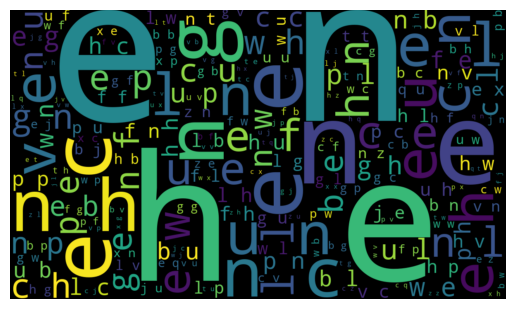

In [15]:
from wordcloud import WordCloud
data['Data']=[" ".join(doc) for doc in data["Data"]]

wordcloud=WordCloud(width=1200,height=700).generate(" ".join(data['Data']))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [17]:
data = pd.read_csv("blogs.csv")
print(data.head())

                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism


In [18]:
print("Dataset Shape:", data.shape)

Dataset Shape: (2000, 2)
